# Question: What run times solicit the most ratings on IMDb?

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_path = '/home/schart/Flatiron/DataScience/Phase1/Project/Movie_Analysis/data/cleaned'
def get_data(data_path, file_name):
    file_path = os.path.join(data_path, file_name)
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_name.endswith('.tsv'):
        df = pd.read_csv(file_path, sep='\t')
    return df

In [4]:
title_basics_ratings_df = get_data(data_path, 'imdb.title.basic_join_ratings.csv')

In [29]:
votes_by_runtime = pd.DataFrame()
votes_by_runtime['numvotes'] = title_basics_ratings_df['numvotes']
votes_by_runtime['binned_runtime'] = title_basics_ratings_df['runtime_minutes'].apply( lambda x: int(np.ceil(x/20)*20))
votes_by_runtime = votes_by_runtime.groupby('binned_runtime').agg('median').reset_index()

<AxesSubplot:xlabel='binned_runtime', ylabel='numvotes'>

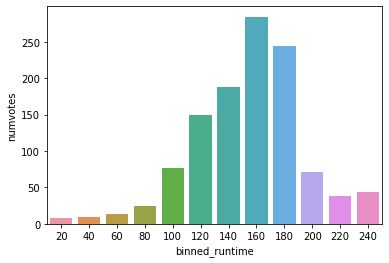

In [30]:
sns.barplot(x='binned_runtime' , y='numvotes' , data=votes_by_runtime)